Aby uruchomić program.jl wystarczy wpisać w konsolę 
julia program.jl
Program wypisze na konsoli przybliżenia pierwszych 20 wyrazów uzyskanych przez każdą z 3 funkcji i do folderu roboczego zapisze 3 wykresy odpowiadające liczbom dokładnych cyfr wyników otrzymanych dla każdej funkcji i zakończy działanie.

Program składa się z uzupełnienia tablicy globalnej "wolfram", definicji funkcji nast(), poprz() i poprzlepszy() oraz wywołań wymienionych funkcji.

W tablicy globalnej "wolfram" zostały zapisane wartości podane przez Wolfram Alpha dla kolejnych wyrazów ciągu {yn}

In [55]:
wolfram = zeros(Float64, 20)
wolfram[1] = 1.0
wolfram[2] = 0.71828182845904523536028747135266249775724709369995957496696762772
wolfram[3] = 0.56343634308190952927942505729467500448550581260008085006606474455
wolfram[4] = 0.46453645613140711824258724217396247981522384329963617470270864952
wolfram[5] = 0.39559954780200964414735126048285009868112787720177870145342438014
wolfram[6] = 0.34468454164698737047617990845556190567047983048928736624642134688
wolfram[7] = 0.30549003693013364202702811216372915806388828027494801124201819956
wolfram[8] = 0.27436153301797609914406257404282923324614085150037548503082203123
wolfram[9] = 0.24902803129726034306372430496719939854197943019658020968956934667
wolfram[10] = 0.22800151548644180472304442168066851233745279173415747807127416106
wolfram[11] = 0.21026515810818538340679883286530886204526638462422731618295185604
wolfram[12] = 0.19509993116082063447870147696895615321405047820923178077154535529
wolfram[13] = 0.18198272336837698713716827075623250597459087697994642493687800896
wolfram[14] = 0.17052370130176741543993168076540741411297481598070962585067550229
wolfram[15] = 0.16042630893253400376131225987155128606262485398931518720683509340
wolfram[16] = 0.15146088553850117517929131340784192075524942987091657965760613327
wolfram[17] = 0.14344677430452525731233514341934984491800678589437772078766336214
wolfram[18] = 0.13623989097759060373825488980436528923312494760116060078902710924
wolfram[19] = 0.12972389988482376433344456506972200232787308927790815997545255215
wolfram[20] = 0.12380383076256994869139616995822245119978530814179637545791658466

0.12380383076256996

Funkcja nast() składa się z 3 części, które zostały wypisane poniżej.
Pierwsza część odpowiada za stworzenie 20-elementowej tablicy "nastepny", której elementy odpowiadają wartościom elementów ciągu {yn} o tych samych indeksach. Wyrazy zostają wyliczane w kolejności y1, y2, ... , y20 przy pomocy wzoru rekurencyjnego yn = e - n * yn-1.

In [56]:
nastepny = zeros(Float64, 20)
e = Base.MathConstants.e
nastepny[1] = e - (e - 1)
i = 2
while i <= 20
    nastepny[i] = e - i * nastepny[i-1]
    i += 1
end

Druga część odpowiada za wypisanie numeru elementu, obliczonej przez część 1. wartości oraz wartości podanej przez wolfram dla wyrazu o podanym na początku lini numerze

In [57]:
i = 1
while i <= 20
    println(i," & ", nastepny[i]," & ", wolfram[i])
    i += 1
end

1 & 1.0 & 1.0
2 & 0.7182818284590451 & 0.7182818284590452
3 & 0.5634363430819098 & 0.5634363430819095
4 & 0.4645364561314058 & 0.4645364561314071
5 & 0.395599547802016 & 0.3955995478020096
6 & 0.34468454164694906 & 0.34468454164698736
7 & 0.30549003693040166 & 0.30549003693013366
8 & 0.27436153301583177 & 0.2743615330179761
9 & 0.24902803131655915 & 0.24902803129726034
10 & 0.22800151529345358 & 0.2280015154864418
11 & 0.21026516023105568 & 0.21026515810818538
12 & 0.19509990568637692 & 0.19509993116082064
13 & 0.18198305453614516 & 0.18198272336837698
14 & 0.17051906495301283 & 0.17052370130176742
15 & 0.1604958541638526 & 0.160426308932534
16 & 0.15034816183740363 & 0.15146088553850118
17 & 0.16236307722318344 & 0.14344677430452527
18 & -0.2042535615582568 & 0.1362398909775906
19 & 6.599099498065924 & 0.12972389988482377
20 & -129.26370813285942 & 0.12380383076256996


Trzecia część polega na obliczeniu tablicy "blad_wzgl" z wartościami odpowiadającymi błędom względnym wartości obliczonych w części pierwszej względem wartości w tablicy "wolfram", a następnie na obliczeniu tablicy dokładne cyfry, zawierającej informację o liczbie dokładnych cyfr wyniku i narysowaniu wykresu liczby dokładnych cyfr od numeru wyrazu.

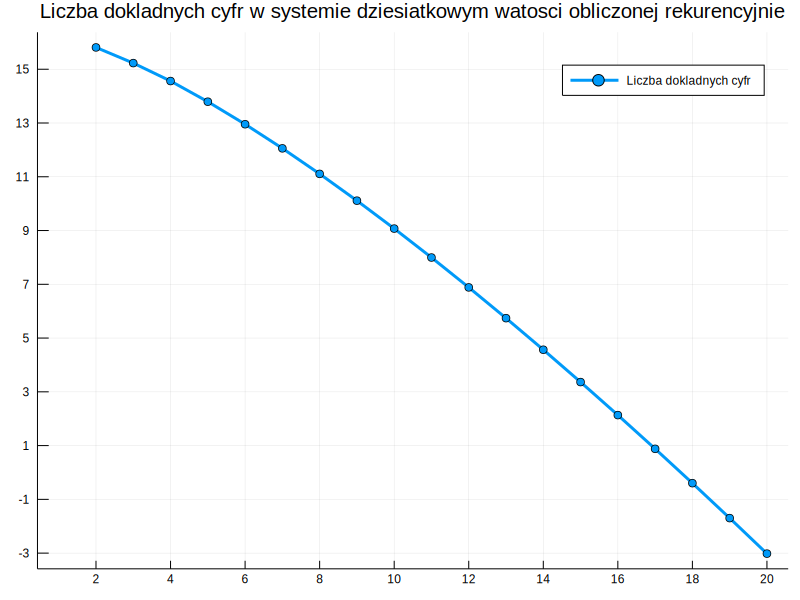

In [58]:
blad_wzgl = zeros(Float64, 20)
using Plots
i = 1
while i <= 20
    blad_wzgl[i] = abs(wolfram[i] - nastepny[i])/wolfram[i]
    i += 1
end
dokladne_cyfry = zeros(Float64, 20)
i = 1
while i <=20
    dokladne_cyfry[i] = - log10(blad_wzgl[i])
    i += 1
end
x = 1:20
pl = plot(x, dokladne_cyfry, size=(800, 600), xticks=0:2:20, yticks=-3:2:18, shape=:circle, ms=4, lw=3,
    title="Liczba dokladnych cyfr w systemie dziesiatkowym watosci obliczonej rekurencyjnie ",label=["Liczba dokladnych cyfr"])
pl

Funkcja poprz() składa się z 3 analogicznych części co funkcja nast(). 
Pierwsza część różni się tym, że elementy tablicy poprzedni są wyliczane w kolejności y20, y19, ... , y1, gdzie y21 zostało przybliżone przez e/22.0, a poprzednie elementy zostają wyliczone ze wzoru yn-1 = (e -yn)/n.

In [59]:
poprzedni = zeros(Float64, 20)
e = Base.MathConstants.e
poprzedni21 = e / (21.0 + 1.0)
poprzedni[20] = (e - poprzedni21) / 21.0
i = 19
while i >=1
    poprzedni[i] = (e - poprzedni[i+1]) / (i+1)
    i -= 1
end


Druga część analogiczna do nast()

In [60]:
i = 1
while i <= 20
    println(i," & ", poprzedni[i]," & ", wolfram[i])
    i += 1
end

1 & 1.0 & 1.0
2 & 0.7182818284590452 & 0.7182818284590452
3 & 0.5634363430819095 & 0.5634363430819095
4 & 0.46453645613140704 & 0.4645364561314071
5 & 0.3955995478020096 & 0.3955995478020096
6 & 0.3446845416469873 & 0.34468454164698736
7 & 0.30549003693013366 & 0.30549003693013366
8 & 0.27436153301797606 & 0.2743615330179761
9 & 0.24902803129726037 & 0.24902803129726034
10 & 0.22800151548644143 & 0.2280015154864418
11 & 0.21026515810818938 & 0.21026515810818538
12 & 0.19509993116077226 & 0.19509993116082064
13 & 0.1819827233690055 & 0.18198272336837698
14 & 0.17052370129296804 & 0.17052370130176742
15 & 0.16042630906452457 & 0.160426308932534
16 & 0.1514608834266519 & 0.15146088553850118
17 & 0.14344681020596278 & 0.14344677430452527
18 & 0.1362392447517153 & 0.1362398909775906
19 & 0.12973617817645441 & 0.12972389988482377
20 & 0.12355826492995658 & 0.12380383076256996


Trzecia część również analogiczna do nast()

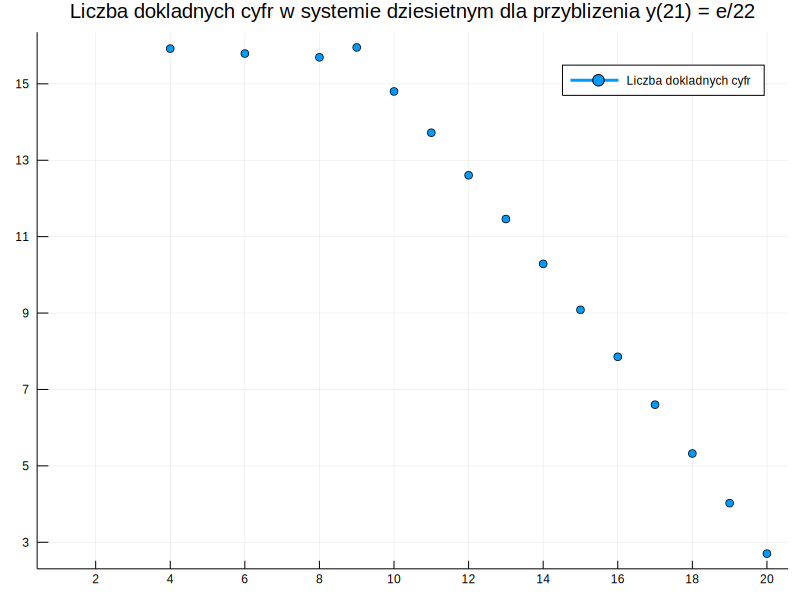

In [65]:
blad_wzgl2 = zeros(Float64, 20)
using Plots
i = 1
while i <= 20
    blad_wzgl2[i] = abs(wolfram[i] - poprzedni[i])/wolfram[i]
    i += 1
end
dokladne_cyfry2 = zeros(Float64, 20)
i = 1
while i <=20
    dokladne_cyfry2[i] = - log10(blad_wzgl2[i])
    i += 1
end
x = 1:20
pl = plot(x, dokladne_cyfry2, seriestype=:path, size=(800, 600), xticks=0:2:20, yticks=-3:2:18, shape=:circle, ms=4, lw=3,
    title="Liczba dokladnych cyfr w systemie dziesietnym dla przyblizenia y(21) = e/22",label=["Liczba dokladnych cyfr"])
pl

Funkcja poprzlepszy() jest analogiczna do funkcji poprz() z tą różnicą, że elementem początkowym, który przybliżamy jest y41 i od niego obliczamy kolejne poprzednie wyrazy y40, y39, ... , y1.

In [62]:
poprzednilepszy = zeros(Float64, 40)
e = Base.MathConstants.e
poprzednilepszy41 = e / (42.0)
poprzednilepszy[40] = (e - poprzednilepszy41) / 41.0
i = 39
while i >=1
    poprzednilepszy[i] = (e - poprzednilepszy[i+1]) / (i+1)
    i -= 1
end


In [63]:
i = 1
while i <= 20
    println(i," & ", poprzednilepszy[i]," & ", wolfram[i])
    i += 1
end

1 & 1.0 & 1.0
2 & 0.7182818284590452 & 0.7182818284590452
3 & 0.5634363430819095 & 0.5634363430819095
4 & 0.46453645613140704 & 0.4645364561314071
5 & 0.3955995478020096 & 0.3955995478020096
6 & 0.3446845416469873 & 0.34468454164698736
7 & 0.30549003693013366 & 0.30549003693013366
8 & 0.27436153301797606 & 0.2743615330179761
9 & 0.2490280312972603 & 0.24902803129726034
10 & 0.2280015154864418 & 0.2280015154864418
11 & 0.21026515810818536 & 0.21026515810818538
12 & 0.19509993116082064 & 0.19509993116082064
13 & 0.18198272336837698 & 0.18198272336837698
14 & 0.17052370130176742 & 0.17052370130176742
15 & 0.16042630893253398 & 0.160426308932534
16 & 0.15146088553850115 & 0.15146088553850118
17 & 0.14344677430452524 & 0.14344677430452527
18 & 0.1362398909775906 & 0.1362398909775906
19 & 0.12972389988482375 & 0.12972389988482377
20 & 0.12380383076256993 & 0.12380383076256996


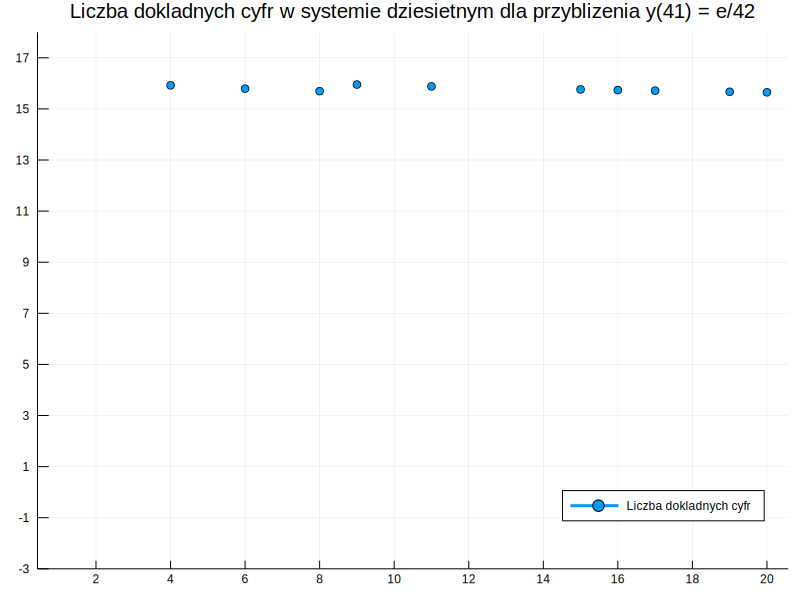

In [66]:
blad_wzgl3 = zeros(Float64, 20)
using Plots
i = 1
while i <= 20
    blad_wzgl3[i] = abs(wolfram[i] - poprzednilepszy[i])/wolfram[i]
    i += 1
end
dokladne_cyfry3 = zeros(Float64, 20)
i = 1
while i <=20
    dokladne_cyfry3[i] = - log10(blad_wzgl3[i])
    i += 1
end
x = 1:20
pl = plot(x, dokladne_cyfry3, seriestype=:path, size=(800, 600), xticks=0:2:20, ylims=(-3, 18), yticks=-3:2:18, 
    shape=:circle, ms=4, lw=3,
    title="Liczba dokladnych cyfr w systemie dziesietnym dla przyblizenia y(41) = e/42",label=["Liczba dokladnych cyfr"],
    legend=:bottomright)
pl